In [1]:
import multimodal_cci as mmcci
import scanpy as sc
import numpy as np
from matplotlib import pyplot as plt

2024-02-09 10:37:28.779587: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-09 10:37:28.999016: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-09 10:37:29.024757: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-09 10:37:29.024800: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc

#### Load stLearn data objects

In [2]:
visium = [
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/vis1_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/vis2_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/vis3_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/vis4_cci.h5ad"),
]

xenium = [
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/xenium1_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/xenium2_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/xenium3_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/xenium4_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/xenium5_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/xenium6_cci.h5ad"),
]

cosmx = [
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/cosmx0_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/cosmx1_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/cosmx2_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/cosmx3_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/cosmx4_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/cosmx5_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/cosmx6_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/cosmx7_cci.h5ad")
]

visium_cci = [sample.uns['per_lr_cci_cell_type'] for sample in visium]
xenium_cci = [sample.uns['per_lr_cci_cell_type'] for sample in xenium]
cosmx_cci = [sample.uns['per_lr_cci_cell_type'] for sample in cosmx]

visium_sizes = [sample.shape[0] for sample in visium]
xenium_sizes = [sample.shape[0] for sample in xenium]
cosmx_sizes = [sample.shape[0] for sample in cosmx]

In [3]:
colors = {
    'Endothelial': plt.colormaps.get_cmap('tab20').colors[0],
    'Fibroblast': plt.colormaps.get_cmap('tab20').colors[1],
    'KC Differentiating': plt.colormaps.get_cmap('tab20').colors[2],
    'KC Cycling': plt.colormaps.get_cmap('tab20').colors[3],
    'KC Basal': plt.colormaps.get_cmap('tab20').colors[4],
    'KC Other': plt.colormaps.get_cmap('tab20').colors[5],
    'NK + T': plt.colormaps.get_cmap('tab20').colors[6],
    'B + PDC': plt.colormaps.get_cmap('tab20').colors[7],
    'Melanocyte': plt.colormaps.get_cmap('tab20').colors[8],
    'Myeloid': plt.colormaps.get_cmap('tab20').colors[9],
    'Pilosebaceous': plt.colormaps.get_cmap('tab20').colors[10]
}

In [4]:
cell_type_replacements = {
    'KC.Basal': 'KC Basal',
    'KC_Basal': 'KC Basal',
    'KC.Cycling': 'KC Cycling',
    'KC_Cyc': 'KC Cycling',
    'KC_Diff': 'KC Differentiating',
    'KC_Other': 'KC Other',
    'NK.T': 'NK + T',
    'B.PDC': 'B + PDC',
    'B...PDC': 'B + PDC',
}
for i in range(len(visium_cci)):
    for lr_pair in visium_cci[i].keys():
        visium_cci[i][lr_pair].rename(
            index=cell_type_replacements,
            columns=cell_type_replacements,
            inplace=True)

for i in range(len(xenium_cci)):
    for lr_pair in xenium_cci[i].keys():
        xenium_cci[i][lr_pair].rename(
            index=cell_type_replacements,
            columns=cell_type_replacements,
            inplace=True)

for i in range(len(cosmx_cci)):
    for lr_pair in cosmx_cci[i].keys():
        cosmx_cci[i][lr_pair].rename(
            index=cell_type_replacements,
            columns=cell_type_replacements,
            inplace=True)

#### Normalise each group of samples

In [5]:
visium_normalised = mmcci.it.normalise_within_tech(visium_cci, visium_sizes, target=visium_sizes[0])
xenium_normalised = mmcci.it.normalise_within_tech(xenium_cci, xenium_sizes, target=xenium_sizes[0])
cosmx_normalised = mmcci.it.normalise_within_tech(cosmx_cci, cosmx_sizes, target=cosmx_sizes[0])

#### Integrate Patients

- 6747: vis4, cosmx1
- 21031: vis2, cosmx2, cosmx3
- 48974: vis1, cosmx4, cosmx5, cosmx6
- 66487: vis3, cosmx7, cosmx8



In [6]:
p6747 = {
    'vis': [visium_normalised[3]],
    'cos': [cosmx_normalised[0]],
}

p21031 = {
    'vis': [visium_normalised[1]],
    'cos': [cosmx_normalised[1], cosmx_normalised[2]],
}

p48974 = {
    'vis': [visium_normalised[0]],
    'cos': [cosmx_normalised[3], cosmx_normalised[4], cosmx_normalised[5]],
}

p66487 = {
    'vis': [visium_normalised[2]],
    'cos': [cosmx_normalised[6], cosmx_normalised[7]],
}

patients = {"6747": p6747, "21031": p21031, "48974": p48974, "66487": p66487}

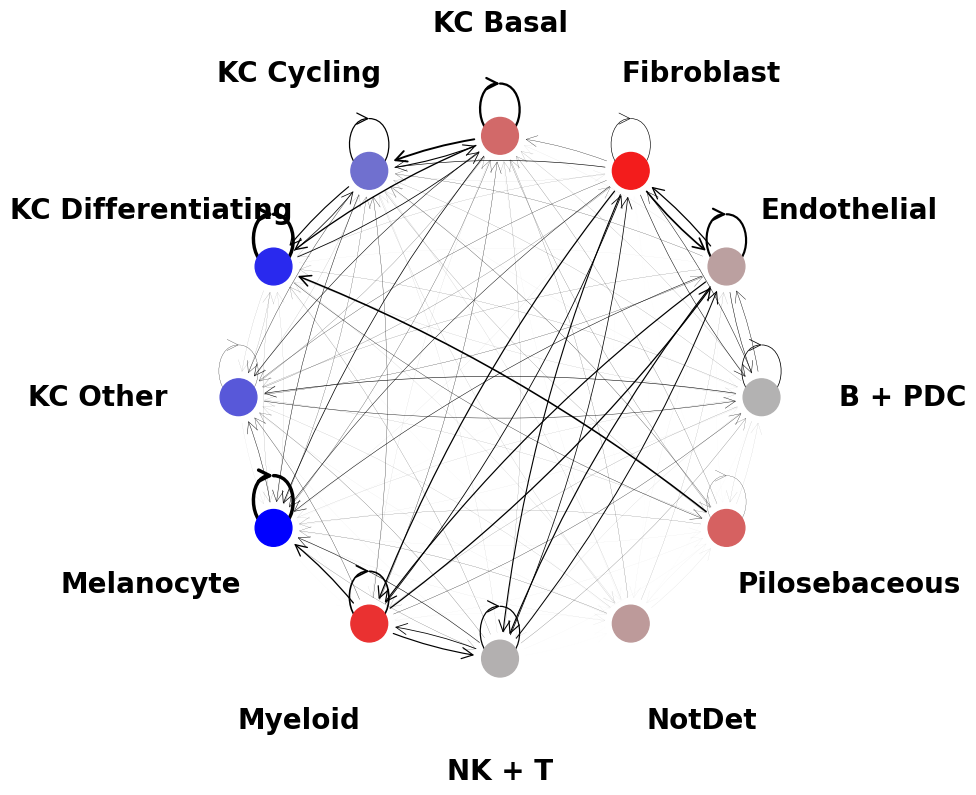

In [7]:
mmcci.plt.network_plot(mmcci.it.calculate_overall_interactions(p21031['cos'][1]), edge_weight=40, text_size=20, node_label_dist=1.1)

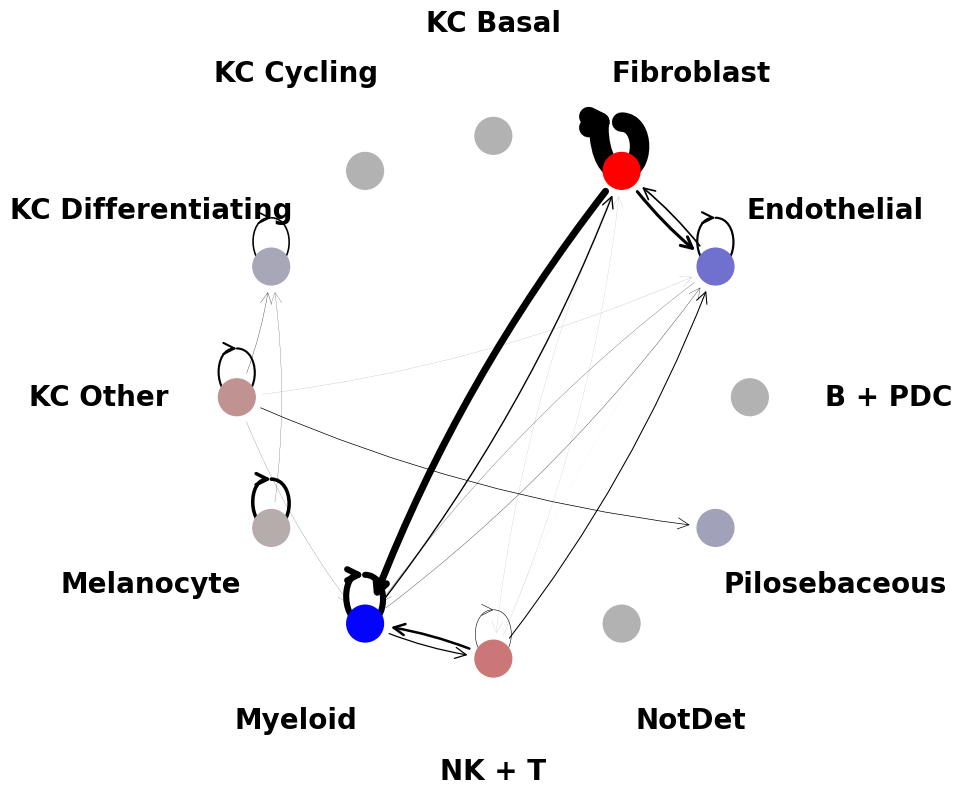

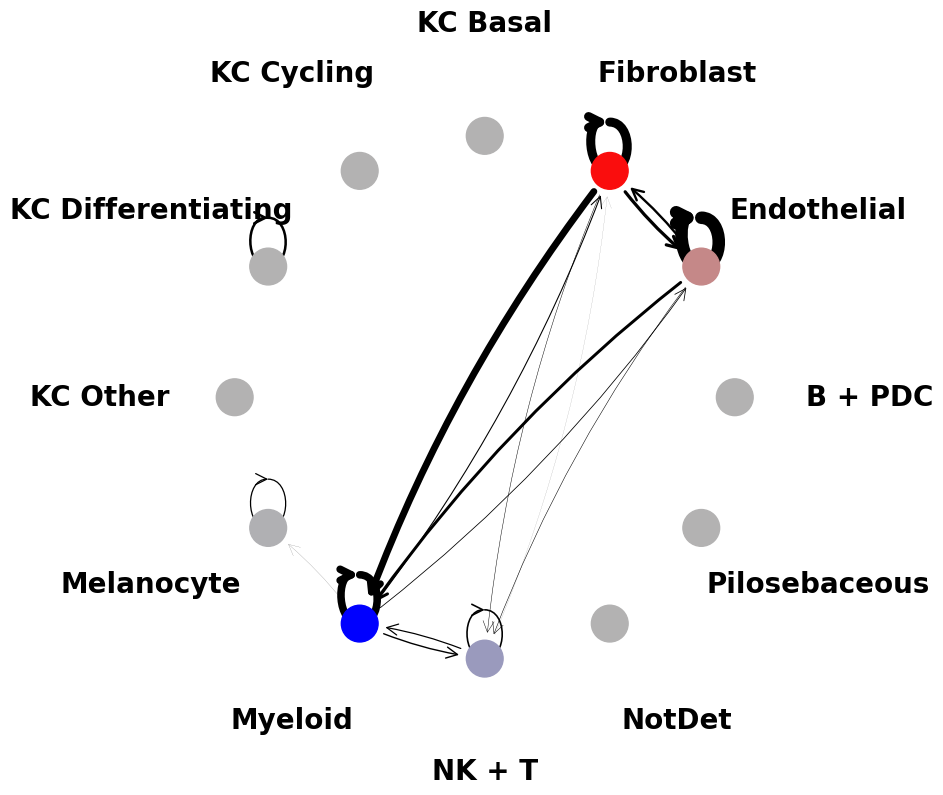

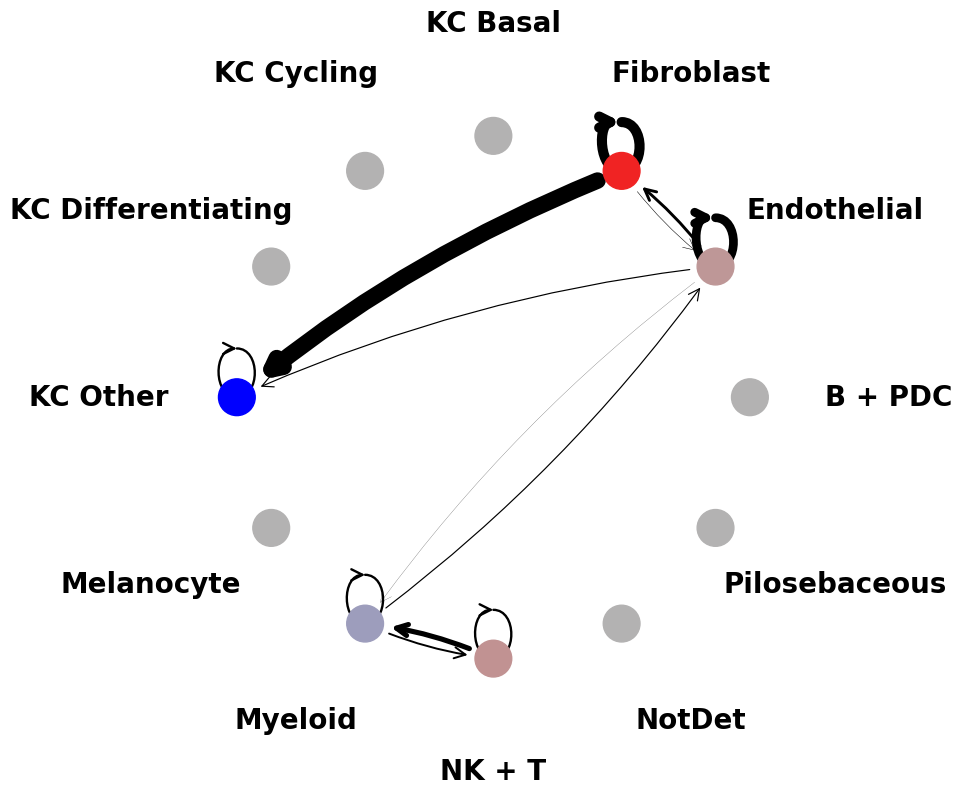

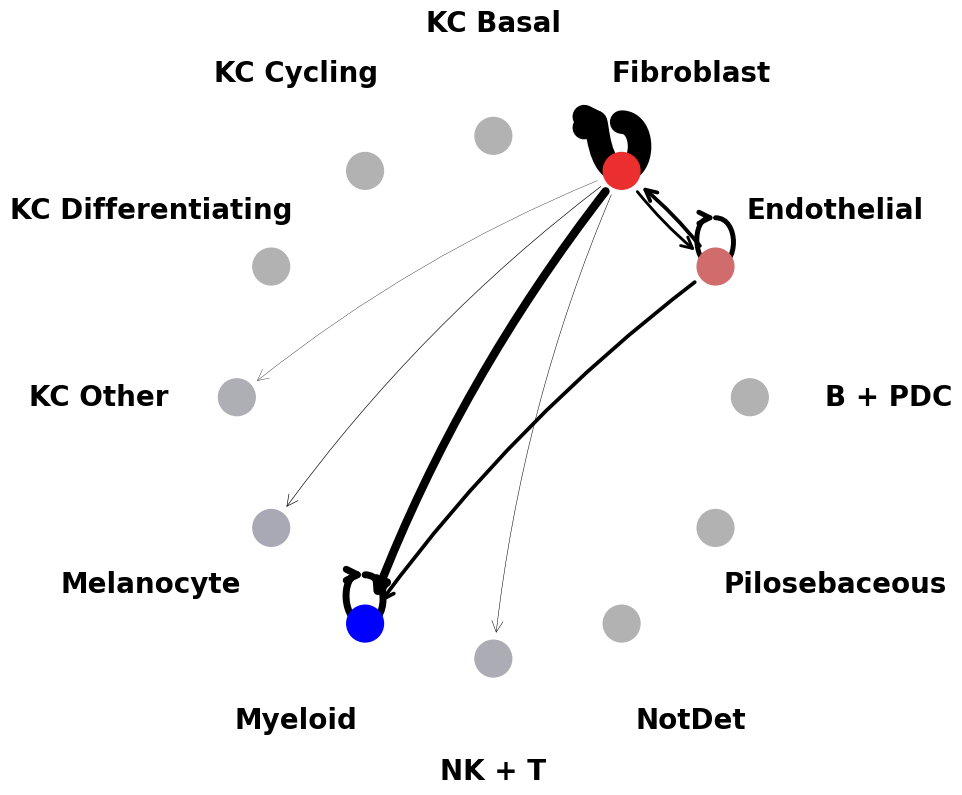

In [8]:
patient_integrated = {}

for patient, samples in patients.items():
    for tech in patients[patient].keys():
        if len(samples[tech]) >= 2:
            samples[tech] = mmcci.it.integrate_samples(samples[tech])
        else:
            samples[tech] = samples[tech][0]
    normalised = mmcci.it.normalise_between_tech([samples['vis'], samples['cos']])
    integrated = mmcci.it.integrate_samples(normalised)
    overall = mmcci.it.calculate_overall_interactions(integrated)
    # mmcci.plt.chord_plot(overall, colors=colors)
    mmcci.plt.network_plot(overall, edge_weight=40, text_size=20, node_label_dist=1.1)
    patient_integrated[patient] = integrated

#### Integrate Patients Together

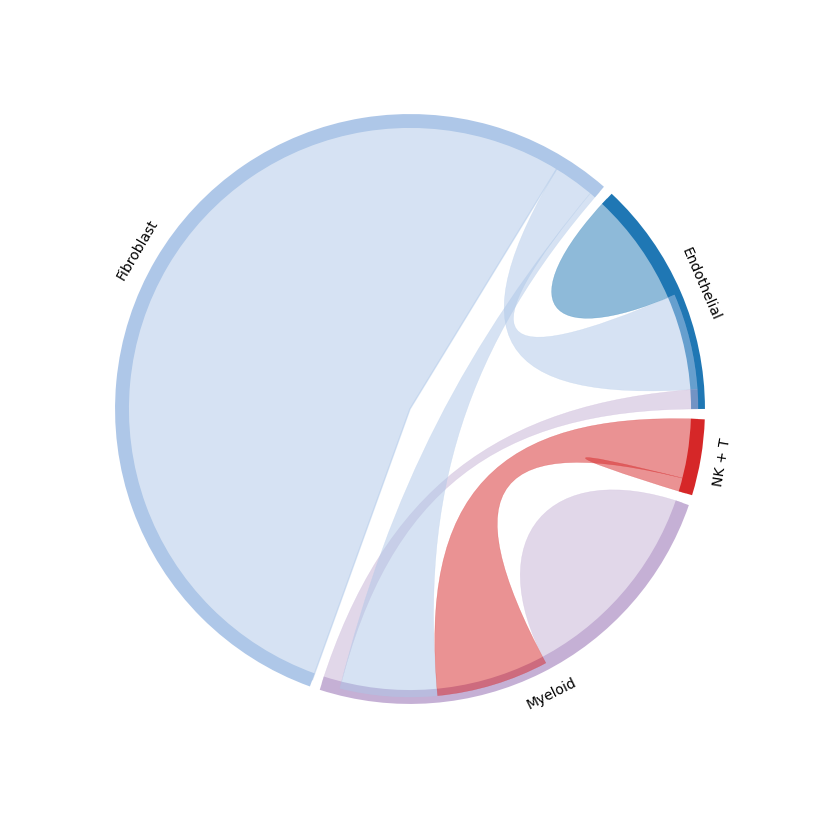

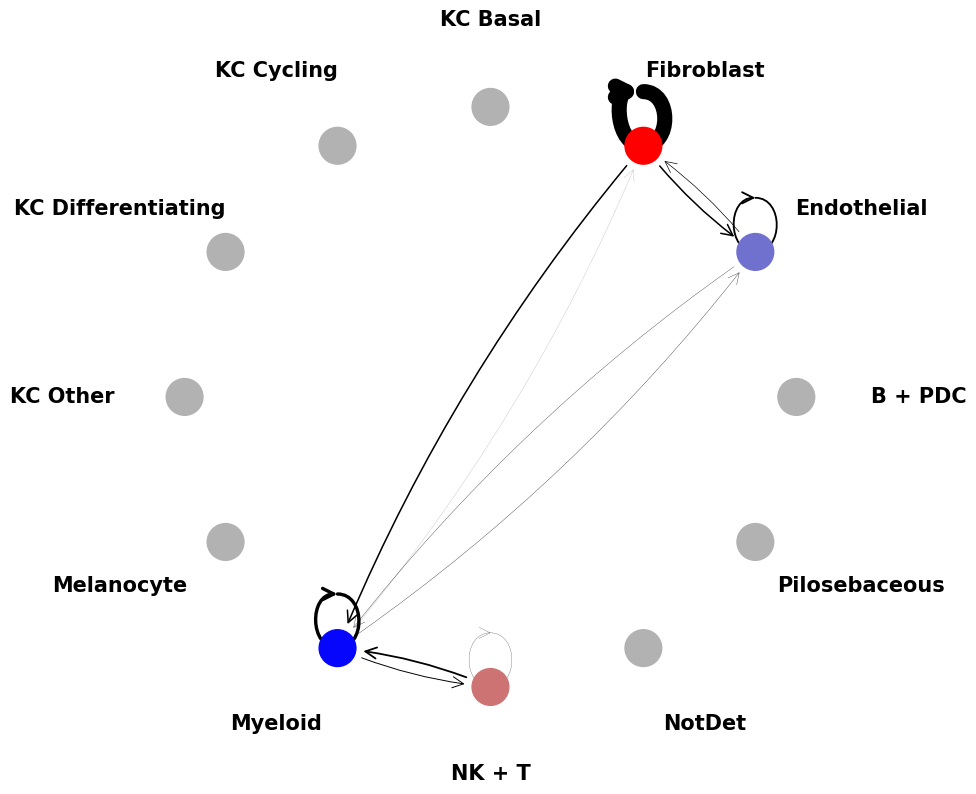

In [9]:
normalised = mmcci.it.normalise_between_tech(
    [patient_integrated['6747'], patient_integrated['21031'], patient_integrated['48974'], patient_integrated['66487']]
    )

integrated = mmcci.it.integrate_samples(normalised)
overall = mmcci.it.calculate_overall_interactions(integrated)

mmcci.plt.chord_plot(overall, colors=colors)
mmcci.plt.network_plot(overall)

#### Integrate within tech

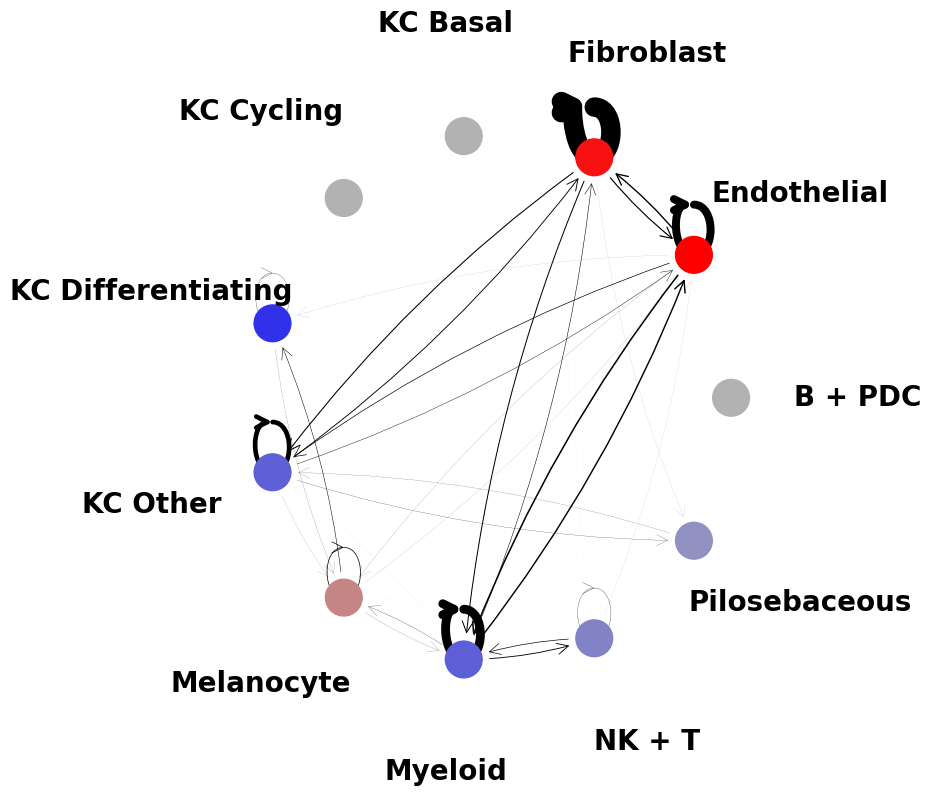

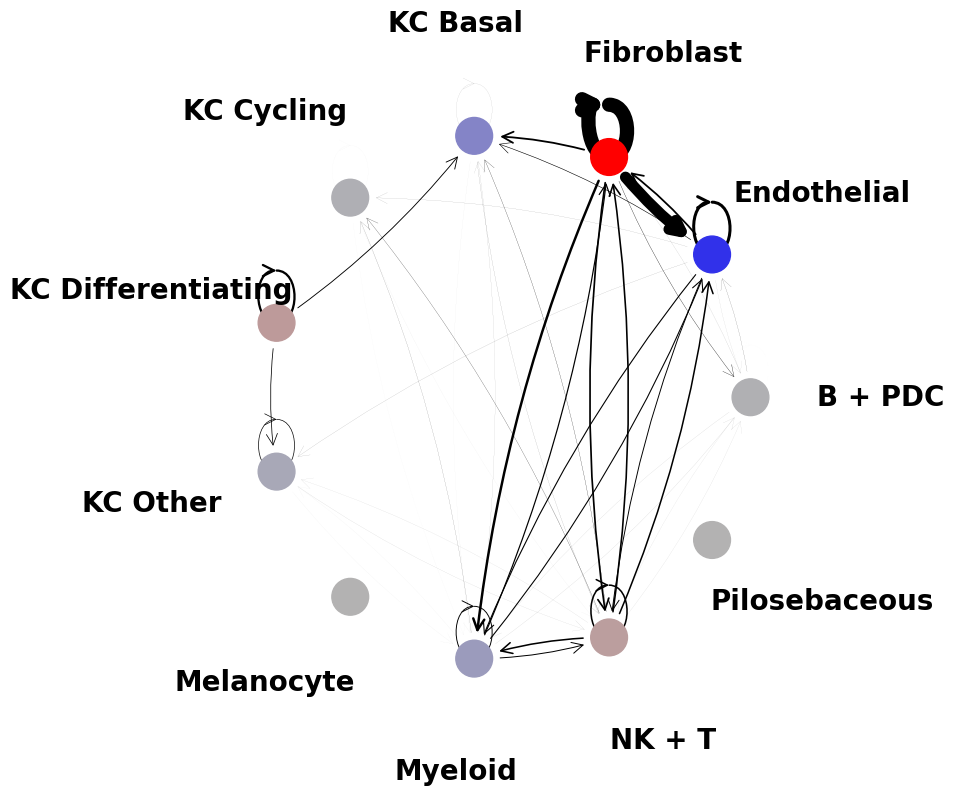

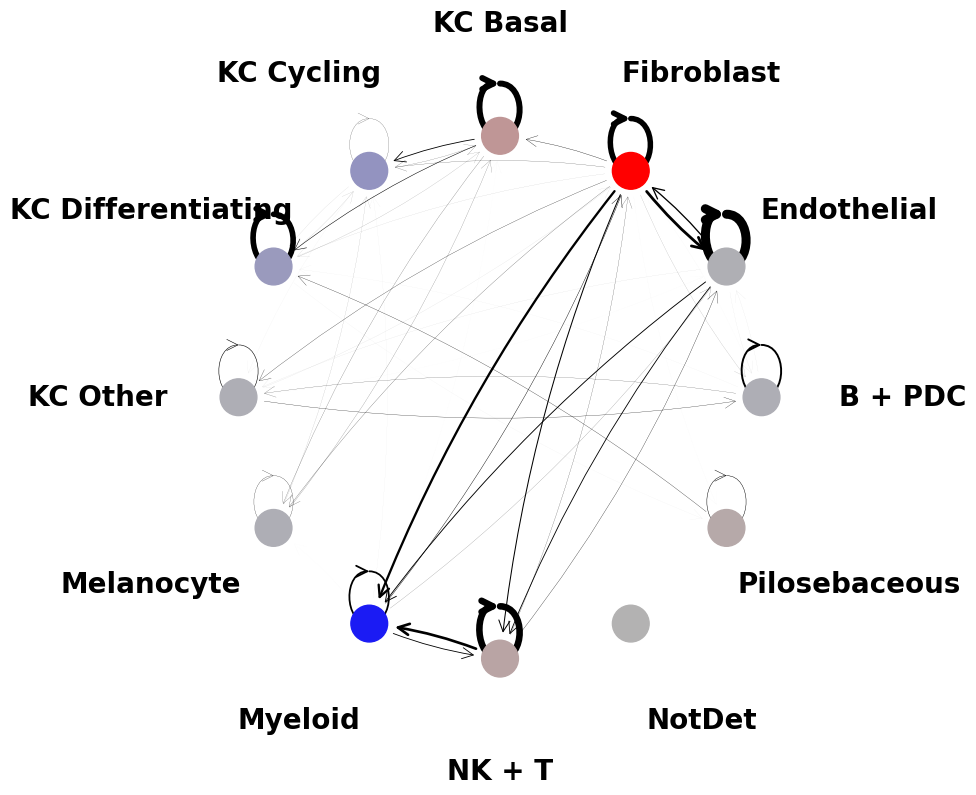

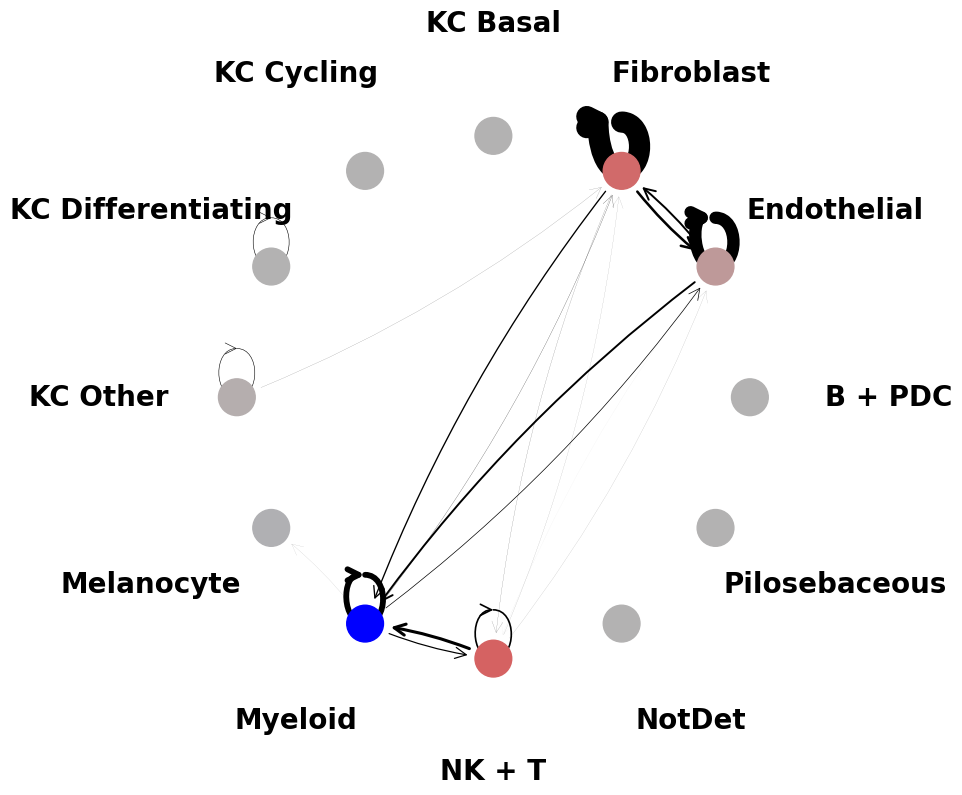

In [10]:
integrated_tech = {}
overall = {}

for tech, samples in zip(['vis', 'xen', 'cos'], [visium_normalised, xenium_normalised, cosmx_normalised]):
    integrated_tech[tech] = mmcci.it.integrate_samples(samples)
    overall[tech] = mmcci.it.calculate_overall_interactions(integrated_tech[tech])
    # mmcci.plt.chord_plot(overall[tech], colors=colors)
    mmcci.plt.network_plot(overall[tech], edge_weight=40, text_size=20, node_label_dist=1.1)
    
normalised = mmcci.it.normalise_between_tech(
    [integrated_tech['vis'], integrated_tech['xen'], integrated_tech['cos']]
    )

integrated = mmcci.it.integrate_samples(normalised)
overall = mmcci.it.calculate_overall_interactions(integrated)

# mmcci.plt.chord_plot(overall, colors=colors)
mmcci.plt.network_plot(overall, edge_weight=40, text_size=20, node_label_dist=1.1)

#### Get LR pairs from Fibroblast to Fibroblast

THBS2
DDR1
COL1A2
DCN
NOTCH3
LGALS1
ITGB1
COL1A1
CD36
CD44
ITGA5
CXCL12
ITGA2
PDGFB
PDGFRA
VIM
VCAN
MET
EGFR
CXCR4
TLR4


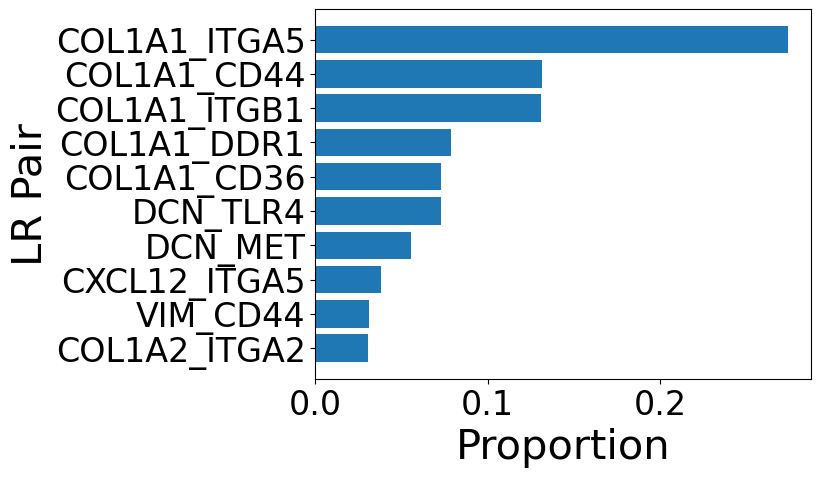

In [11]:
# mmcci.plt.lrs_per_celltype(integrated, "Fibroblast", "Endothelial")

n=10
pairs = mmcci.an.get_lrs_per_celltype(integrated, "Fibroblast", "Endothelial")
keys = list(pairs.keys())[:n]
values = list(pairs.values())[:n]
keys.reverse()
values.reverse()
plt.barh(keys, values)
plt.xlabel("Proportion", fontsize=30)  # Increase the font size of the x-axis label
plt.ylabel("LR Pair", fontsize=30)  # Increase the font size of the y-axis label
plt.tick_params(axis='both', which='major', labelsize=24)  # Increase the font size of the tick labels

gene_list = set()

for lr in pairs:
    gene1, gene2 = lr.split("_")
    gene_list.add(gene1)
    gene_list.add(gene2)

gene_list = list(gene_list)

for gene in gene_list:
    print(gene)

# mmcci.an.run_gsea(None, lrs=pairs, gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"])

CCR10
LTBR
LTB
ICAM3
CCR7
TNFRSF1A
PTPRC
IL16
CD4
CCL19
ICAM1
ITGB2
LGALS1
CD40
ICAM2
MRC1
IL2RA


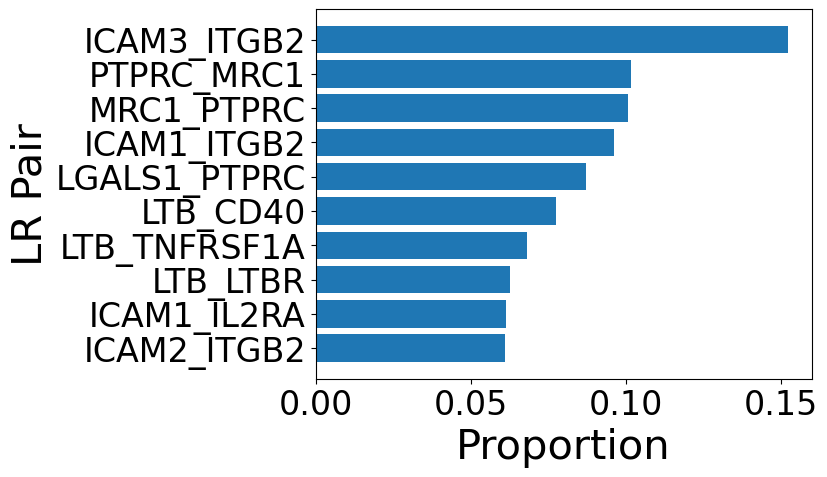

In [12]:
# mmcci.plt.lrs_per_celltype(integrated, "Fibroblast", "Endothelial")

n=10
pairs = mmcci.an.get_lrs_per_celltype(integrated, "NK + T", "Myeloid")
keys = list(pairs.keys())[:n]
values = list(pairs.values())[:n]
keys.reverse()
values.reverse()
plt.barh(keys, values)
plt.xlabel("Proportion", fontsize=30)  # Increase the font size of the x-axis label
plt.ylabel("LR Pair", fontsize=30)  # Increase the font size of the y-axis label
plt.tick_params(axis='both', which='major', labelsize=24)  # Increase the font size of the tick labels

gene_list = set()

for lr in pairs:
    gene1, gene2 = lr.split("_")
    gene_list.add(gene1)
    gene_list.add(gene2)

gene_list = list(gene_list)

for gene in gene_list:
    print(gene)
# mmcci.an.run_gsea(None, lrs=pairs, gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"])

CXCL12
CD93
CCR7
APP
C1QA
CD14
MIF
CCL19
ITGB1
CD74


Exception: Error sending gene list, try again later

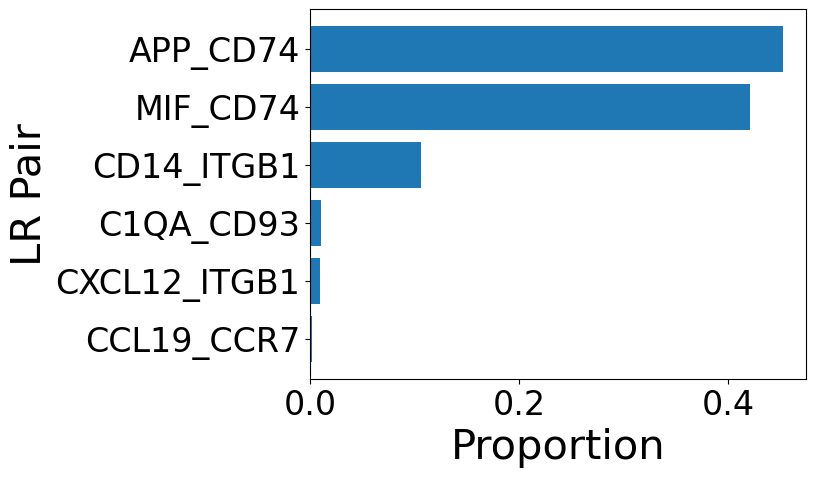

In [14]:
# mmcci.plt.lrs_per_celltype(integrated, "Fibroblast", "Endothelial")

n=10
pairs = mmcci.an.get_lrs_per_celltype(integrated, "Myeloid", "Endothelial")
keys = list(pairs.keys())[:n]
values = list(pairs.values())[:n]
keys.reverse()
values.reverse()
plt.barh(keys, values)
plt.xlabel("Proportion", fontsize=30)  # Increase the font size of the x-axis label
plt.ylabel("LR Pair", fontsize=30)  # Increase the font size of the y-axis label
plt.tick_params(axis='both', which='major', labelsize=24)  # Increase the font size of the tick labels


gene_list = set()

for lr in pairs:
    gene1, gene2 = lr.split("_")
    gene_list.add(gene1)
    gene_list.add(gene2)

gene_list = list(gene_list)

for gene in gene_list:
    print(gene)
mmcci.an.run_gsea(None, lrs=pairs, gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"])

#### Cluster Aged and Young LR Pairs

In [52]:
import pickle

file_path = "/scratch/project/stseq/Levi/mmcci/mmcci_melanoma/integrated.pkl"

# Save the integrated object as a pickle file
with open(file_path, "wb") as file:
    pickle.dump(integrated, file)

In [56]:
import numpy as np
for lr, matrix in integrated.items():
    matrix = np.nan_to_num(matrix)
    if np.isnan(matrix).any():
        print("NaN values found in matrix for LR:", lr)


In [27]:
clusters = mmcci.an.lr_grouping(integrated, n_clusters=0)
integrated_clusters = mmcci.an.subset_clusters(integrated, clusters)
overall_clusters = mmcci.an.calculate_cluster_interactions(integrated_clusters)

Computing Dissimilarity Scores for multiple interactions...


Processing: 100%|██████████| 53/53 [00:01<00:00, 46.41it/s]


Computing Principal Components of weighted graph ...


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [12]:
for cluster, matrix in overall_clusters.items():
    print("\ncluster" + str(cluster) + ": Contains " + str(len(integrated_clusters[cluster])) + " LR pairs")
    mmcci.plt.network_plot(matrix)

NameError: name 'overall_clusters' is not defined

Computing Dissimilarity Scores for multiple interactions...


Processing: 100%|██████████| 37/37 [00:00<00:00, 71.85it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...


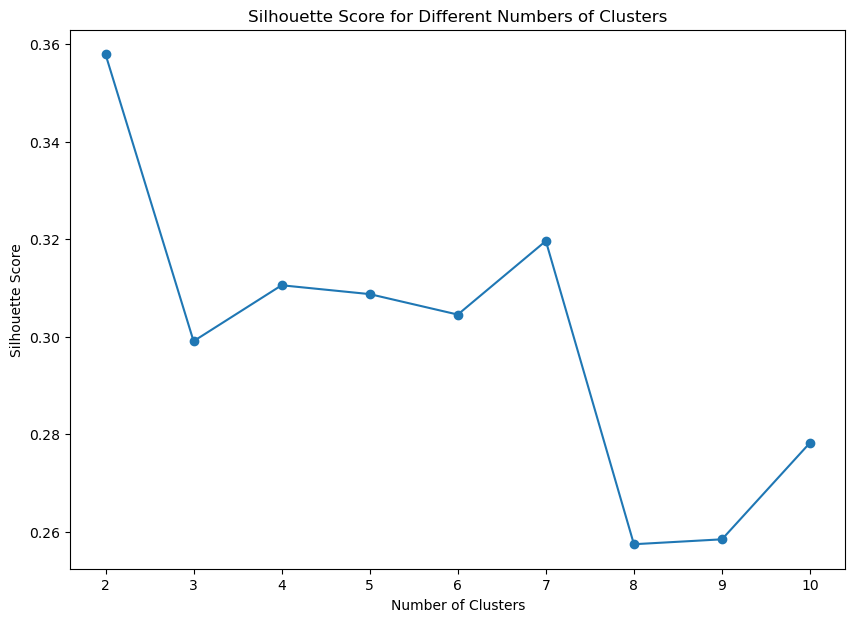

Computing Dissimilarity Scores for single interactions...


Processing: 100%|██████████| 98/98 [00:04<00:00, 22.95it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...


In [ ]:
young_clusters = mmcci.an.lr_grouping(young_integrated, n_clusters=0)
young_integrated_clusters = mmcci.an.subset_clusters(young_integrated, young_clusters)
young_overall_clusters = mmcci.an.calculate_cluster_interactions(young_integrated_clusters)


cluster0: Contains 26 LR pairs


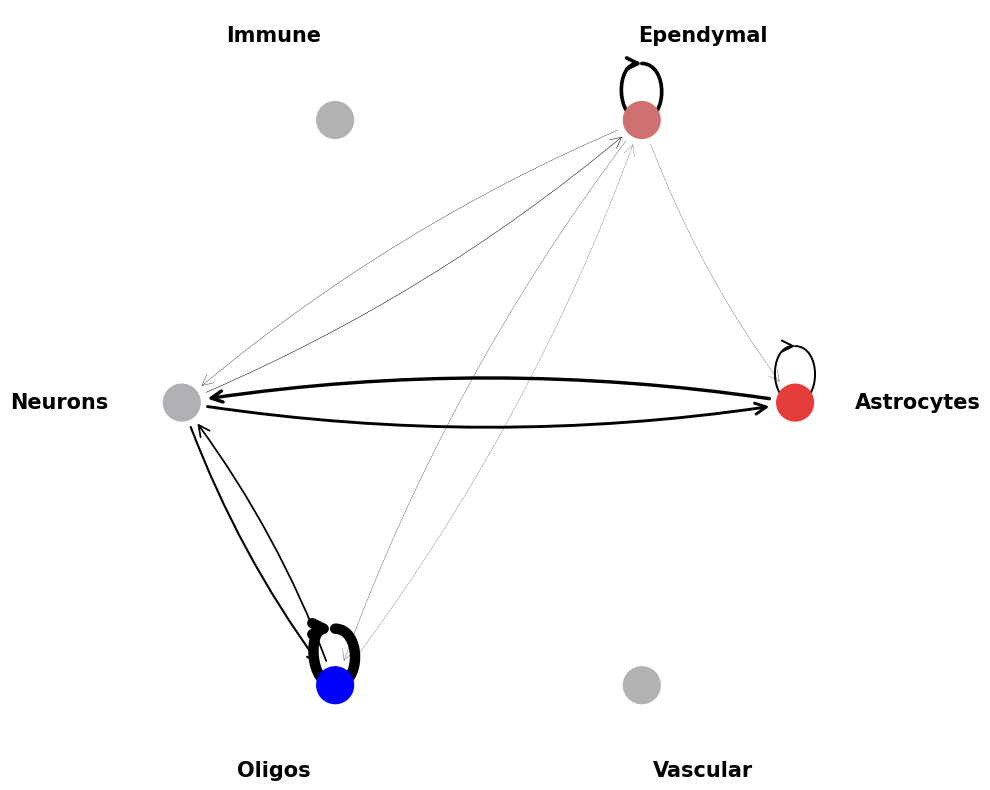


cluster1: Contains 11 LR pairs


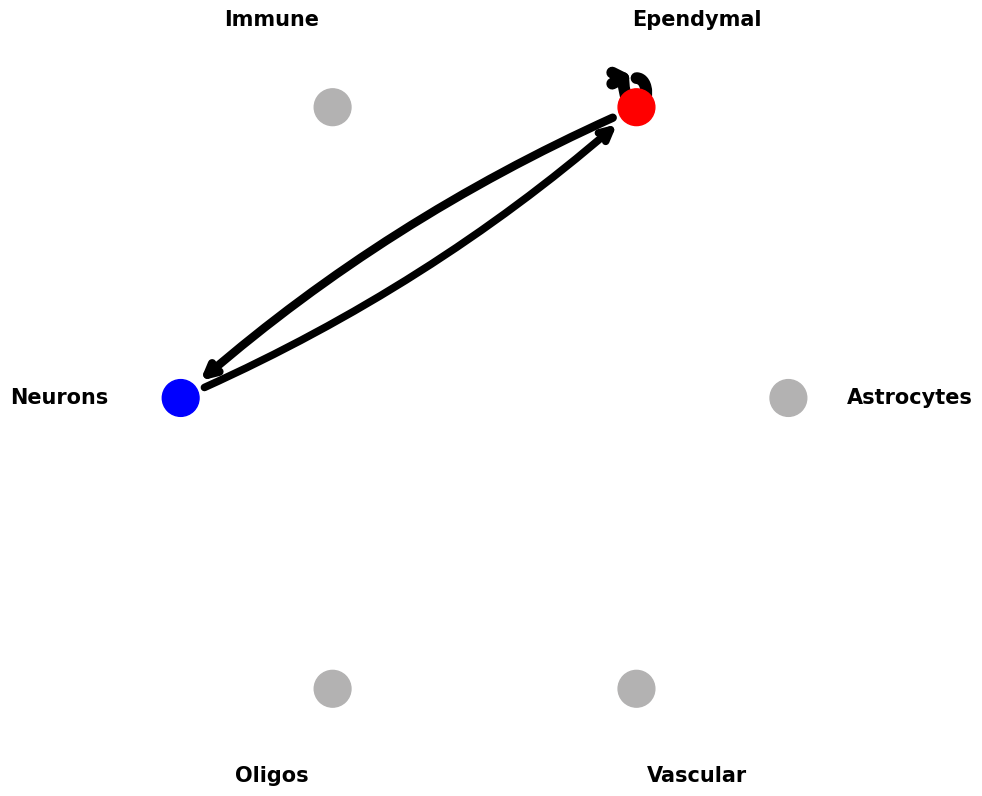


cluster2: Contains 37 LR pairs


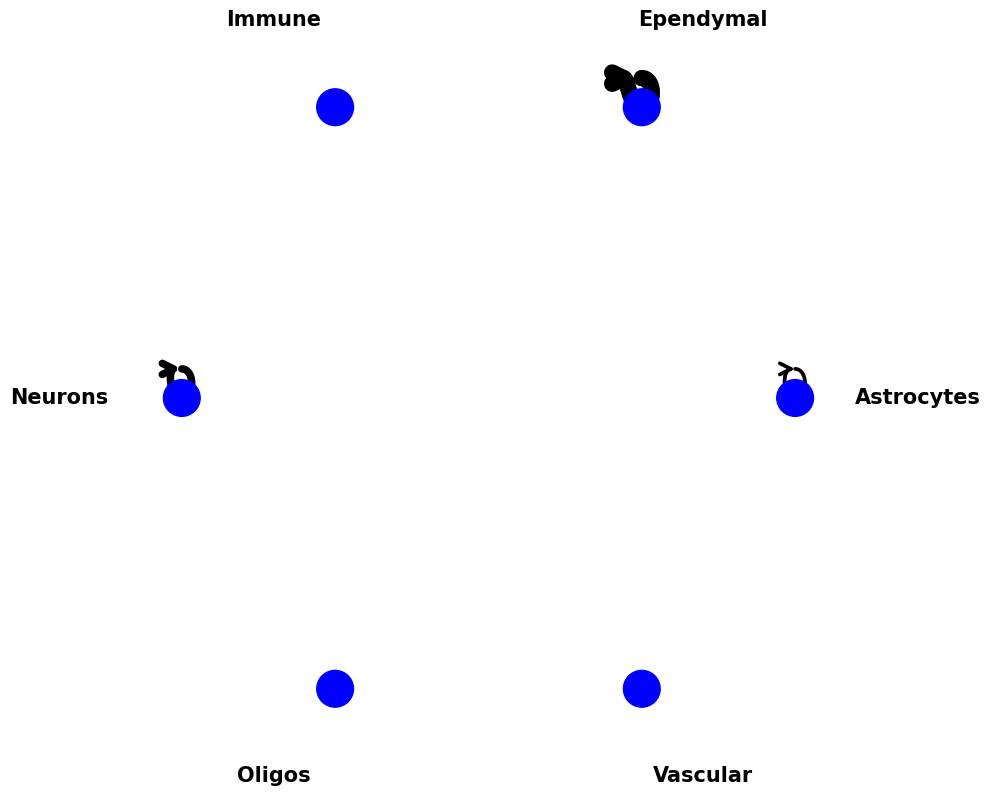


cluster3: Contains 61 LR pairs


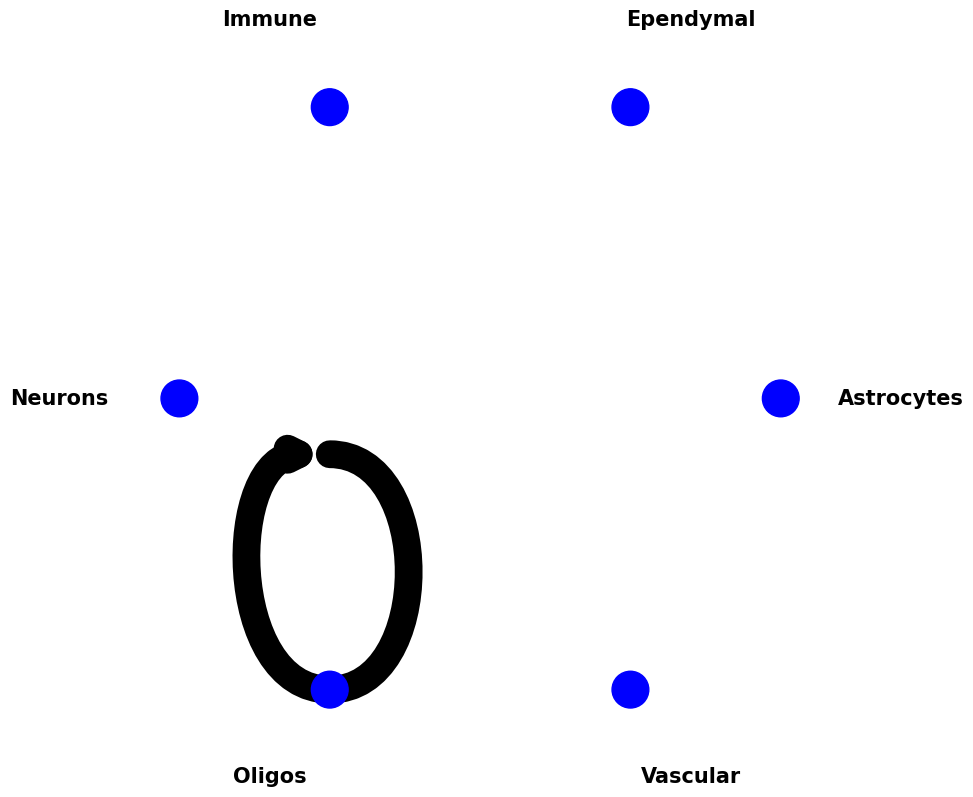

In [ ]:
for cluster, matrix in young_overall_clusters.items():
    if matrix is not None:
        print("\ncluster" + str(cluster) + ": Contains " + str(len(young_integrated_clusters[cluster])) + " LR pairs")
        mmcci.plt.network_plot(matrix)

#### Run GSEA Analysis on Clusters

/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,25/200,2.058022e-28,8.026285e-27,0,0,38.081081,2427.693193,NOTCH2;ITGB1;LRP1;SERPINE2;SDC4;LAMA2;LAMA1;FB...
1,MSigDB_Hallmark_2020,Angiogenesis,6/36,2.179519e-08,4.250063e-07,0,0,42.733333,753.883364,LRPAP1;VTN;LPL;ITGAV;VEGFA;FGFR1
2,MSigDB_Hallmark_2020,UV Response Dn,8/144,5.853843e-07,7.609996e-06,0,0,12.776341,183.353240,PDGFRB;COL1A1;NOTCH2;TGFBR3;COL1A2;FZD2;SDC2;CAV1
3,MSigDB_Hallmark_2020,Apoptosis,8/161,1.362950e-06,1.328876e-05,0,0,11.346980,153.250714,PDGFRB;TGFBR3;TGFB2;CAV1;BGN;PLAT;PSEN1;CD44
4,MSigDB_Hallmark_2020,Myogenesis,8/200,6.834697e-06,5.331064e-05,0,0,9.024267,107.330110,COL1A1;ITGB1;TGFB1;NOTCH1;LAMA2;PLXNB2;FGF2;HBEGF
...,...,...,...,...,...,...,...,...,...,...
195,KEGG_2021_Human,Human immunodeficiency virus 1 infection,1/212,6.527138e-01,6.693435e-01,0,0,0.952220,0.406233,GNAI2
196,KEGG_2021_Human,cAMP signaling pathway,1/216,6.596123e-01,6.721366e-01,0,0,0.934314,0.388771,GNAI2
197,KEGG_2021_Human,Thermogenesis,1/232,6.858755e-01,6.945028e-01,0,0,0.868893,0.327624,FGFR1
198,KEGG_2021_Human,Parkinson disease,1/249,7.115841e-01,7.160315e-01,0,0,0.808632,0.275147,GNAI2


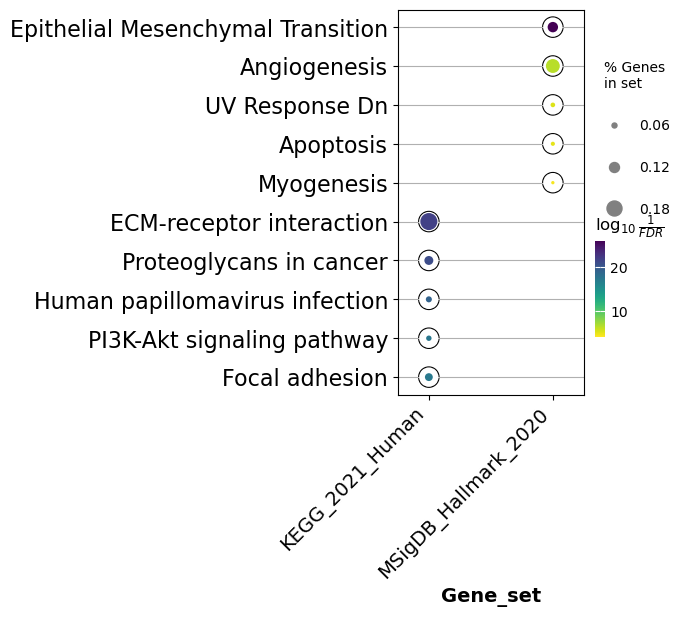

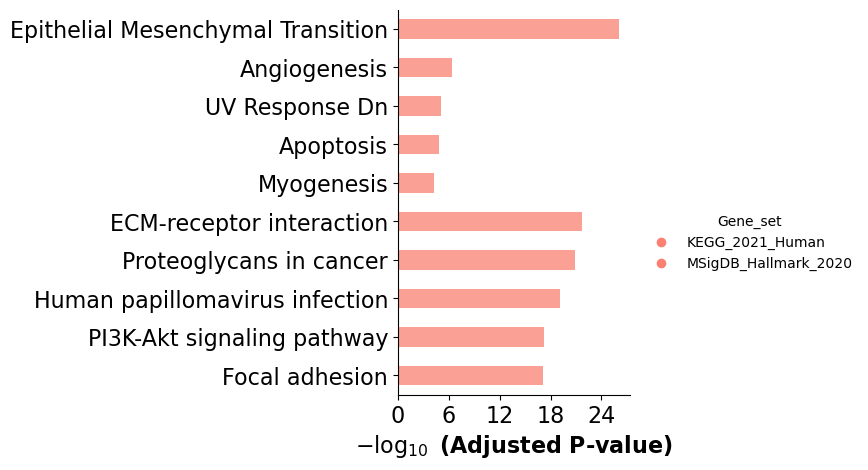

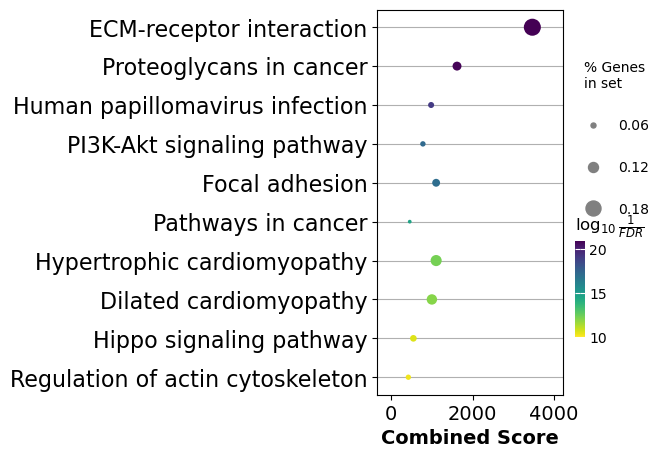

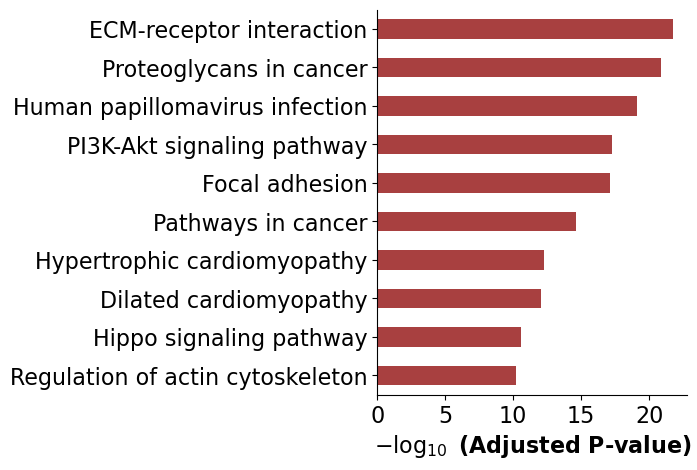

In [ ]:
aged_cluster_0_gsea = mmcci.an.run_gsea(aged_integrated_clusters[0])
aged_cluster_0_gsea